In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *


### Updating Parameters

In [2]:
def update_parameters(parameters,grads,learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural networks
    # Update rule for each parameter
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W"+str(l+1)] - learning_rate*(grads["dW"+str(l+1)])
        parameters["b" + str(l+1)] = parameters["b"+str(l+1)] - learning_rate*(grads["db"+str(l+1)])
    return parameters

### Loading Dataset
The dataset is named "moons" because the data from each of the two classes looks a bit like a crescent-shaped moon.

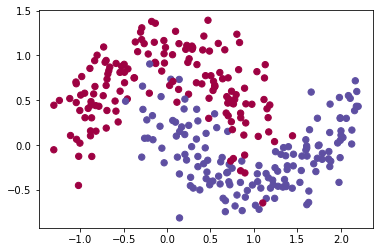

In [5]:
train_X, train_Y = load_dataset()

### Neural Network Model

In [11]:
def model(X,Y,layer_dims,learning_rate,iterations):
    L = len(layers_dims) 
    m = X.shape[1]
    
    parameters = initialize_parameters(layers_dims)
    
    for i in range(iterations):
        
        AL,caches = forward_propagation(X,parameters)
        
        grads = backward_propagation(X,Y,caches)
        
        update_parameters(parameters,grads,learning_rate)
    
    return parameters

In [12]:
import time

### Architecture

In [13]:
layers_dims = [train_X.shape[0], 5, 2, 1]

### Training

In [14]:
tic = time.time()
final_parameters = model(train_X,train_Y,layers_dims,0.0007,10000)
toc = time.time()
print('Training Time : ',toc-tic,' seconds')

Training Time :  0.9896869659423828  seconds


### Prediction

In [15]:
predictions = predict(train_X, train_Y, final_parameters)

Accuracy: 0.66


### Decision Boundry

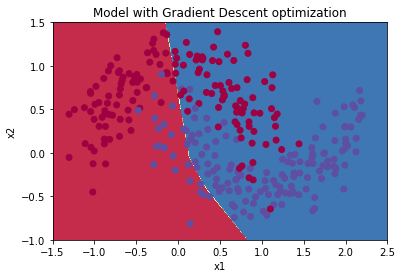

In [16]:
# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(final_parameters, x.T), train_X, train_Y)